# SkimLit NLP Project
Input: Medical journal's abstracts

Outputs: Segmented abstract with different parts labelled (background, objectives, conclusion, etc.) 

**Paper**:
https://arxiv.org/pdf/1710.06071.pdf

## Get data
Author's GitHUb: https://github.com/Franck-Dernoncourt/pubmed-rct

In [1]:
# Start with 20k dataset with numbers replaced with @
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [2]:
# Check file names
import os
filenames = [data_dir +  filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocess data
Convert text data into:
```
[{'line_number': 0,
  'target': 'BACKGROUND',
  'text': 'Emotional eating is associated with overeating and the development of obesity .\n',
  'total_lines': 11},
  {...}]
```

In [3]:
# Create function to read line sof document
def get_lines(filename):
    """
    Reads filename (text file) and returns the lines of text as a list.
    
    Args:
        filename (str): the filepath to the target file
        
    Retruns:
        A list of strings with one list per line from the target filename.
    """
    with open(filename, "r") as f:
        return f.readlines()

In [4]:
# Read in training lines
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
# Create function to preprocess text with line numbers
def preprocess_text_with_line_numbers(filename):
    """
    Returns a list of dictionaries of abstract line data.
    
    Takes in filename, reads its contents and sorts through each line,
    extracting things like the target label, the text of the sentence,
    how many sentences are in the current abstract and what sentence
    number the target line is.
    
    Args:
      filename: a string of the target text file to read and extract line data
      from.

    Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
    """
    input_lines = get_lines(filename) # get all lines from filename
    abstract_lines = "" # create emppty abstract
    abstract_samples = [] # create empty list for abstracts
    
    # Loop through each line in the target file
    for line in input_lines:
        if line.startswith("###"): # check to see if line is ID line
            abstract_ID = line
            abstract_lines = "" # reset abstract lines if line is ID
            
        elif line.isspace(): # check to see if line is new line
            abstract_lines_split = abstract_lines.splitlines() # split abstract into separate lines
            
            # Iterate through each line in singel abstract and count them
            for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
                line_data = {} # create empty dictionary for line data
                target_text_split = abstract_line.split("\t") # split target label from text
                line_data["target"] = target_text_split[0] # get target label
                line_data["text"] = target_text_split[1].lower() # get text data and make all lowercase
                line_data["line_number"] = abstract_line_number # get line number
                line_data["total_lines"] = len(abstract_lines_split) - 1 # total lines in abstract
                abstract_samples.append(line_data) # add line data to abstract samples
                
                
        else: # if line is text line
            abstract_lines += line
            
    return abstract_samples

In [6]:
# Get data from file and preprocess it
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [7]:
# Check first abstract of training data
train_samples[:20]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [8]:
# Create pandas dataframe using samples
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [9]:
# DIstribution of lables
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

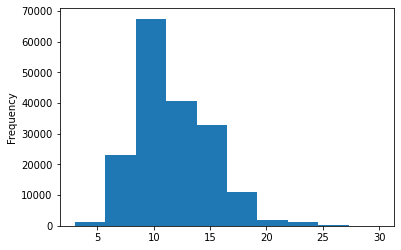

In [10]:
# check length of different lines
train_df.total_lines.plot.hist();

In [11]:
# Convert samples to list
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

## Make Numeric Labels

In [12]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) # returns array instead of sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check OH labels
train_labels_one_hot[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [13]:
# Label encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

# Check labels
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [14]:
# Get class names and number of classes from LabelEncoder instance
class_names = label_encoder.classes_
num_classes = len(label_encoder.classes_)
class_names, num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

## Model 0 (Baseline): Naive-Bayes tfidf

In [15]:
# Create model 0
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

In [16]:
# Fit model
model_0.fit(X=train_sentences, y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [17]:
# Evaluate baseline model
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [18]:
# Make predictions and evaluate results
from helper_functions import calculate_results
preds_baseline = model_0.predict(val_sentences)
results_baseline = calculate_results(val_labels_encoded, preds_baseline)
results_baseline

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 1: 1D Conv 

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers

In [20]:
# How long is each sentence average?
sentence_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sentence_len = np.mean(sentence_lens)
avg_sentence_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

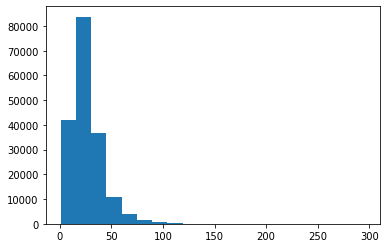

In [21]:
# Distrbution
import matplotlib.pyplot as plt
plt.hist(sentence_lens, bins=20)

In [22]:
# What sentence length is 90% of examples?
output_sequence_length = int(np.percentile(sentence_lens, 95))
output_sequence_length

55

In [23]:
# Maximum sequence length
max(sentence_lens)

296

In [24]:
# Create text vecotrizer layer
max_tokens = 68000 # max vocab based on paper
text_vectorizer = TextVectorization(max_tokens=max_tokens,# number of words in vocabulary
                                    output_sequence_length=output_sequence_length) # desired output length of vectorized sequences

In [25]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [26]:
# Test out text vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of Text: {len(target_sentence.split())}")
print(f"\nVectorized Text: {text_vectorizer([target_sentence])}")

Text:
therapists in the condition that received ongoing coaching and consultation were significantly stronger in four of the domains : practical support , collaboration , knowledge , and skill at mediating vignettes .

Length of Text: 32

Vectorized Text: [[ 3393     5     2   424    28    80  1650  3060     3  2447     9    39
   3186     5   297     4     2  1731  3301   279  5366   494     3  2945
     15  4820 10112     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [27]:
# How many words in training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"No. of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

No. of words in vocab: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [28]:
# Get the config of text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': True}

In [29]:
# Create customer text mbedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                             output_dim=128,
                             mask_zero=True, # use masking to handle variable sequence length
                             name="token_embedding")

In [30]:
# Show sample embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 therapists in the condition that received ongoing coaching and consultation were significantly stronger in four of the domains : practical support , collaboration , knowledge , and skill at mediating vignettes .

Sentence after vectorization (before embedding):
 [[ 3393     5     2   424    28    80  1650  3060     3  2447     9    39
   3186     5   297     4     2  1731  3301   279  5366   494     3  2945
     15  4820 10112     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Sentence after embedding:
 [[[-0.01366553 -0.0112061  -0.02640227 ...  0.003408   -0.0465085
    0.01428078]
  [-0.00322024  0.01238818  0.04938406 ... -0.04060106 -0.02523384
   -0.01100463]
  [-0.01653977  0.0013172  -0.03165609 ...  0.04209295 -0.03462525
    0.03642129]
  ...
  [-0.01526861  0.03940848  0.01512093 ...  0.01739777  0.01960831
   -0.02919303]

### Creating Datasets and Data Pipeline

In [31]:
# Turn our datsets into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

val_dataset, train_dataset, test_dataset

(<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>,
 <TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>,
 <TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>)

In [32]:
# Take the TensorSliceDatasets and turn them into prefetched data
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset, train_dataset

(<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>)

In [33]:
# Create model 1 1d conv
inputs = layers.Input(shape=(1,), dtype="string")
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding of tokens
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condenses output of feature vector from conv layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_conv1d")

In [34]:
# Compile model
model_1.compile(optimizer="adam",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])

In [36]:
# Model summary
model_1.summary()

Model: "model_1_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
__________________________________________

In [37]:
# Fit model
history_1_conv1d = model_1.fit(train_dataset,
                                      epochs=3,
                                      steps_per_epoch=int(0.1*len(train_dataset)),
                                      validation_data=val_dataset,
                                      validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 27s 47ms/step - loss: 1.1679 - accuracy: 0.5197 - val_loss: 0.6841 - val_accuracy: 0.7443
Epoch 2/3
562/562 [==============================] - 26s 47ms/step - loss: 0.6756 - accuracy: 0.7473 - val_loss: 0.6313 - val_accuracy: 0.7739
Epoch 3/3
562/562 [==============================] - 28s 50ms/step - loss: 0.6199 - accuracy: 0.7722 - val_loss: 0.5943 - val_accuracy: 0.7886


In [38]:
# Evaluate model on whole valid dataset
model_1.evaluate(val_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.5963 - accuracy: 0.7877


[0.5962533950805664, 0.7877002358436584]

In [39]:
# Make predictions
pred_probs_model_1 = model_1.predict(val_dataset)
pred_probs_model_1.shape, pred_probs_model_1

((30212, 5),
 array([[4.3526977e-01, 1.6831070e-01, 8.9088999e-02, 2.7186802e-01,
         3.5462458e-02],
        [4.4380090e-01, 2.8833312e-01, 1.1802314e-02, 2.4766858e-01,
         8.3951531e-03],
        [1.4995600e-01, 8.3577884e-03, 2.1439127e-03, 8.3950627e-01,
         3.6012003e-05],
        ...,
        [5.8499372e-06, 7.6014904e-04, 8.5229642e-04, 3.3194074e-06,
         9.9837840e-01],
        [6.0294524e-02, 4.9483475e-01, 8.1755519e-02, 6.9790423e-02,
         2.9332483e-01],
        [1.8412279e-01, 6.7072272e-01, 3.8705889e-02, 6.1205104e-02,
         4.5243591e-02]], dtype=float32))

In [40]:
# Convert pred probs to classes
preds_model_1 = tf.argmax(pred_probs_model_1, axis=1)
preds_model_1

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [41]:
# Calculate results
results_model_1 = calculate_results(y_true=val_labels_encoded,
                                    y_pred=preds_model_1)
results_model_1

{'accuracy': 78.77002515556732,
 'precision': 0.7849286362229138,
 'recall': 0.7877002515556732,
 'f1': 0.785583812464948}

## Model 2: Feature extraction with pretrained token embeddings

In [42]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [43]:
# Test out the pretrained embedding on a random sentence
random_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_sentence])
print(f"Sentence after emebedding:\n {use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
 concomitant topiramate resulted in decreased systemic exposure to pioglitazone and its active metabolites , with geometric lsm ratios and @ % ci for auc@ of @ % ( @ % , @ % ) for pioglitazone , @ % ( @ % , @ % ) for m-iii , and @ % ( @ % , @ % ) for m-iv , respectively .
Sentence after emebedding:
 [-0.05038282 -0.01567073  0.04524048 -0.0593362   0.04197872  0.01878404
  0.01880026 -0.07839324 -0.02028934  0.04704168  0.06753425  0.03030708
  0.0003203   0.0659723   0.01144836 -0.04576302 -0.08748128 -0.00905128
  0.03876464 -0.02572319  0.05153862 -0.01771937 -0.06230777 -0.05399334
  0.07693545  0.02690622  0.02859716 -0.01051618  0.04673811  0.07011968]

Length of sentence embedding: 512


In [44]:
# Create model
inputs = layers.Input(shape=[], dtype="string")
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_use")

# Compile model
model_2.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [45]:
# Model summary
model_2.summary()

Model: "model_2_use"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [46]:
# Fit model
history_2_use = model_2.fit(train_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=val_dataset,
                            validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 7ms/step - loss: 1.0877 - accuracy: 0.5898 - val_loss: 0.7967 - val_accuracy: 0.6875
Epoch 2/3
562/562 [==============================] - 4s 6ms/step - loss: 0.7732 - accuracy: 0.7009 - val_loss: 0.7561 - val_accuracy: 0.7058
Epoch 3/3
562/562 [==============================] - 4s 6ms/step - loss: 0.7592 - accuracy: 0.7111 - val_loss: 0.7417 - val_accuracy: 0.7111


In [47]:
# Evaluate model
model_2.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.7451 - accuracy: 0.7123


[0.7451012134552002, 0.7123328447341919]

In [48]:
# Make predictions with feature extraction model
pred_probs_model_2 = model_2.predict(val_dataset)
preds_model_2 = tf.argmax(pred_probs_model_2, axis=1)
results_model_2 = calculate_results(val_labels_encoded, preds_model_2)
results_model_2

{'accuracy': 71.23328478750165,
 'precision': 0.7123678120550535,
 'recall': 0.7123328478750165,
 'f1': 0.7095497171887325}

In [49]:
results_model_1

{'accuracy': 78.77002515556732,
 'precision': 0.7849286362229138,
 'recall': 0.7877002515556732,
 'f1': 0.785583812464948}

## Model 3: Conv1D w/ Character-level embeddings 

### Create character-level tokenizer

In [50]:
# Make function to split sentences into characters
def split_chars(text):
    return " ".join(list(text))

# Splitting non-character-level sequence into characters
split_chars(random_sentence)

'c o n c o m i t a n t   t o p i r a m a t e   r e s u l t e d   i n   d e c r e a s e d   s y s t e m i c   e x p o s u r e   t o   p i o g l i t a z o n e   a n d   i t s   a c t i v e   m e t a b o l i t e s   ,   w i t h   g e o m e t r i c   l s m   r a t i o s   a n d   @   %   c i   f o r   a u c @   o f   @   %   (   @   %   ,   @   %   )   f o r   p i o g l i t a z o n e   ,   @   %   (   @   %   ,   @   %   )   f o r   m - i i i   ,   a n d   @   %   (   @   %   ,   @   %   )   f o r   m - i v   ,   r e s p e c t i v e l y   .'

In [51]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [52]:
# What's average character length?
chars_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(chars_lens)
mean_char_len

149.3662574983337

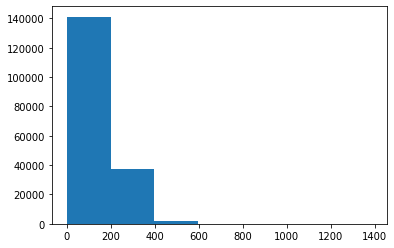

In [53]:
# Check distribution
import matplotlib.pyplot
plt.hist(chars_lens, bins=7);

In [54]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

290

In [55]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
# Create char-level token vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    name="char_vectorizer")

In [57]:
# Adapt vectorizer to training chars
char_vectorizer.adapt(train_chars)

In [58]:
# Check vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Length of vocab: {len(char_vocab)}")
print(f"Most common chars: {char_vocab[:5]}")
print(f"Least common chars: {char_vocab[-5:]}")

Length of vocab: 28
Most common chars: ['', '[UNK]', 'e', 't', 'i']
Least common chars: ['k', 'x', 'z', 'q', 'j']


In [59]:
# Test out char_vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"Length of random train chars: {len(random_train_chars)}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"Vectorized chars:\n {vectorized_chars}")
print(f"Length of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
 t h e   p u r p o s e   o f   t h i s   s t u d y   i s   t o   d e t e r m i n e   w h e t h e r   e x t r a c r a n i a l - i n t r a c r a n i a l   b y p a s s   c a n   r e d u c e   i n c i d e n c e   o f   r e b l e e d i n g   a n d   i m p r o v e   p a t i e n t   p r o g n o s i s   .
Length of random train chars: 297
Vectorized chars:
 [[ 3 13  2 14 16  8 14  7  9  2  7 17  3 13  4  9  9  3 16 10 19  4  9  3
   7 10  2  3  2  8 15  4  6  2 20 13  2  3 13  2  8  2 24  3  8  5 11  8
   5  6  4  5 12  4  6  3  8  5 11  8  5  6  4  5 12 22 19 14  5  9  9 11
   5  6  8  2 10 16 11  2  4  6 11  4 10  2  6 11  2  7 17  8  2 22 12  2
   2 10  4  6 18  5  6 10  4 15 14  8  7 21  2 14  5  3  4  2  6  3 14  8
   7 18  6  7  9  4  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0

In [60]:
# Create customer text mbedding layer
char_embed = layers.Embedding(input_dim=len(char_vocab), # length of vocabulary
                             output_dim=25,
                             mask_zero=True, # use masking to handle variable sequence length
                             name="char_embedding")

In [61]:
# Test char embedding
print(f"Charified text: {random_train_chars}")
char_embed_examples = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars:\n {char_embed_examples}")
print(f"Shape of embedded char: {char_embed_examples.shape}")

Charified text: t h e   p u r p o s e   o f   t h i s   s t u d y   i s   t o   d e t e r m i n e   w h e t h e r   e x t r a c r a n i a l - i n t r a c r a n i a l   b y p a s s   c a n   r e d u c e   i n c i d e n c e   o f   r e b l e e d i n g   a n d   i m p r o v e   p a t i e n t   p r o g n o s i s   .
Embedded chars:
 [[[ 0.00687295 -0.02274187 -0.03520662 ...  0.04068976  0.01662036
   -0.02300869]
  [ 0.02052591 -0.01628218  0.00549845 ...  0.04945913 -0.02249718
    0.02012842]
  [-0.00210421 -0.03231883  0.004817   ... -0.03466912 -0.00210259
   -0.00277997]
  ...
  [ 0.02505909  0.03351548  0.03376618 ...  0.03345281  0.01130847
    0.00820534]
  [ 0.02505909  0.03351548  0.03376618 ...  0.03345281  0.01130847
    0.00820534]
  [ 0.02505909  0.03351548  0.03376618 ...  0.03345281  0.01130847
    0.00820534]]]
Shape of embedded char: (1, 290, 25)


In [62]:
# Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [63]:
# Create model 3
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_conv1d_char")

# Compile model
model_3.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [64]:
# Check model summary
model_3.summary()

Model: "model_3_conv1d_char"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embedding (Embedding)   (None, 290, 25)           700       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_____________________________________________

In [65]:
# Fit model
history_3_conv1d_char = model_3.fit(train_char_dataset,
                             epochs=3,
                             steps_per_epoch=int(0.1*len(train_char_dataset)),
                             validation_data=val_char_dataset,
                             validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 10ms/step - loss: 1.4163 - accuracy: 0.4051 - val_loss: 1.0506 - val_accuracy: 0.5848
Epoch 2/3
562/562 [==============================] - 5s 10ms/step - loss: 1.0290 - accuracy: 0.5929 - val_loss: 0.9392 - val_accuracy: 0.6307
Epoch 3/3
562/562 [==============================] - 6s 10ms/step - loss: 0.9362 - accuracy: 0.6352 - val_loss: 0.8670 - val_accuracy: 0.6596


In [66]:
# Evaluate on whole val dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.8800 - accuracy: 0.6580


[0.8800021409988403, 0.6580166816711426]

In [67]:
# Use model to predict results and evaluate
pred_probs_model_3 = model_3.predict(val_char_dataset)
preds_model_3 = tf.argmax(pred_probs_model_3, axis=1)
results_model_3 = calculate_results(val_labels_encoded, preds_model_3)
results_model_3

{'accuracy': 65.80166821130676,
 'precision': 0.6454875211007919,
 'recall': 0.6580166821130676,
 'f1': 0.647923389871037}

## Model 4: Hybrid Embedding Layer (token + character embedding)

In [76]:
# Combine chars and tokens into a training dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [77]:
# Combine chars and tokens into a validation dataset
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

# Prefetch and batch validation data
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [78]:
# Combine chars and tokens into a test dataset
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))

# Prefetch and batch test data
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [79]:
# Check datasets
train_char_token_dataset, val_char_token_dataset, test_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [68]:
# Set up token inputs/model
token_inputs = layers.Input(shape=[], dtype="string", name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs, name="model_token")

# Set up character-level inputs/model
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# Create hybrid token embedding (concatenate char and tokem embeds)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# Create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
outputs = layers.Dense(num_classes, activation="softmax")(final_dropout)

# Construct model with char and tokens inputs
model_4 = tf.keras.Model([token_model.inputs, char_model.inputs], outputs, name="model_4_token_char_embeddings")

In [69]:
# Get summary of model
model_4.summary()

Model: "model_4_token_char_embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_input[0][0]                
______________________________________________________________________

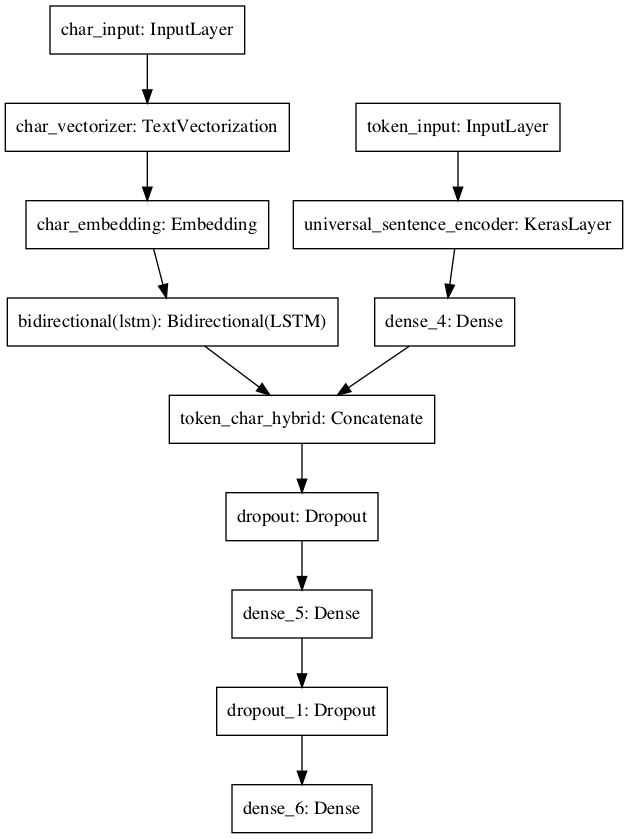

In [74]:
# Plot hybrid model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [73]:
# Compiel model
model_4.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [82]:
# Fit model
history_model_4_char_token_embed = model_4.fit(train_char_token_dataset,
                                               epochs=3,
                                               steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                                               validation_data=val_char_token_dataset,
                                               validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 104s 175ms/step - loss: 1.1688 - accuracy: 0.5208 - val_loss: 0.7820 - val_accuracy: 0.7031
Epoch 2/3
562/562 [==============================] - 83s 148ms/step - loss: 0.8112 - accuracy: 0.6894 - val_loss: 0.7177 - val_accuracy: 0.7277
Epoch 3/3
562/562 [==============================] - 82s 146ms/step - loss: 0.7780 - accuracy: 0.6976 - val_loss: 0.6990 - val_accuracy: 0.7334


In [83]:
# Evaluate on model
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 24s 26ms/step - loss: 0.7029 - accuracy: 0.7314


[0.7028898000717163, 0.731431245803833]

In [84]:
# Predict on model and calculate results
pred_probs_model_4 = model_4.predict(val_char_token_dataset)
preds_model_4 = tf.argmax(pred_probs_model_4, axis=1)
results_model_4 = calculate_results(val_labels_encoded, preds_model_4)
results_model_4

{'accuracy': 73.14312193830266,
 'precision': 0.7314668903463841,
 'recall': 0.7314312193830266,
 'f1': 0.7291509969186262}

## Model 5: Character + Token + Positional (Tribrid) Embedding Layer

In [85]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


### Create Postional Embeddings

In [86]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<AxesSubplot:ylabel='Frequency'>

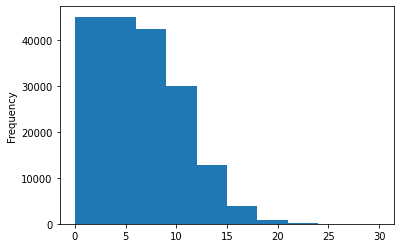

In [87]:
# Check distribution of "line_number" column
train_df.line_number.plot.hist()

In [108]:
# Create one-hot encded tensors of "line_number" feature
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [89]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<AxesSubplot:ylabel='Frequency'>

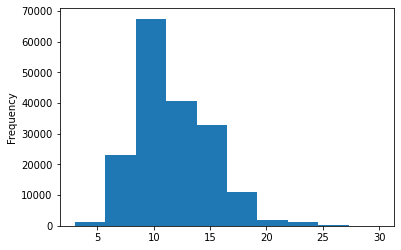

In [90]:
# Plot distribution of total lines
train_df.total_lines.plot.hist()

In [92]:
# Check coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98)

20.0

In [93]:
# Create one-hot encded tensors of "total_lines" feature
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)
train_total_lines_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

In [96]:
# Set up token inputs/model
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(num_classes, activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

# Set up character inputs/model
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# Set up line numbers inputs/model
line_number_inputs = layers.Input(shape=(15,) , dtype=tf.float32, name="line_number_inputs")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, x)

# Set up total lines inputs/model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name="total_lines_inputs")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, y)

# Concatenate token char inputs/models
combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                                          char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# Combine positional embeddings with combined embeddings
tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")([line_number_model.output,
                                                                                 total_lines_model.output,
                                                                                 z])

# Create output layer
output_layer = layers.Dense(num_classes, activation="softmax", name="output_layer")(tribrid_embeddings)

# Create whole model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="model_5_tribrid_embedding_model")

In [97]:
# Get summary of tribrid model
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_inputs[0][0]               
____________________________________________________________________

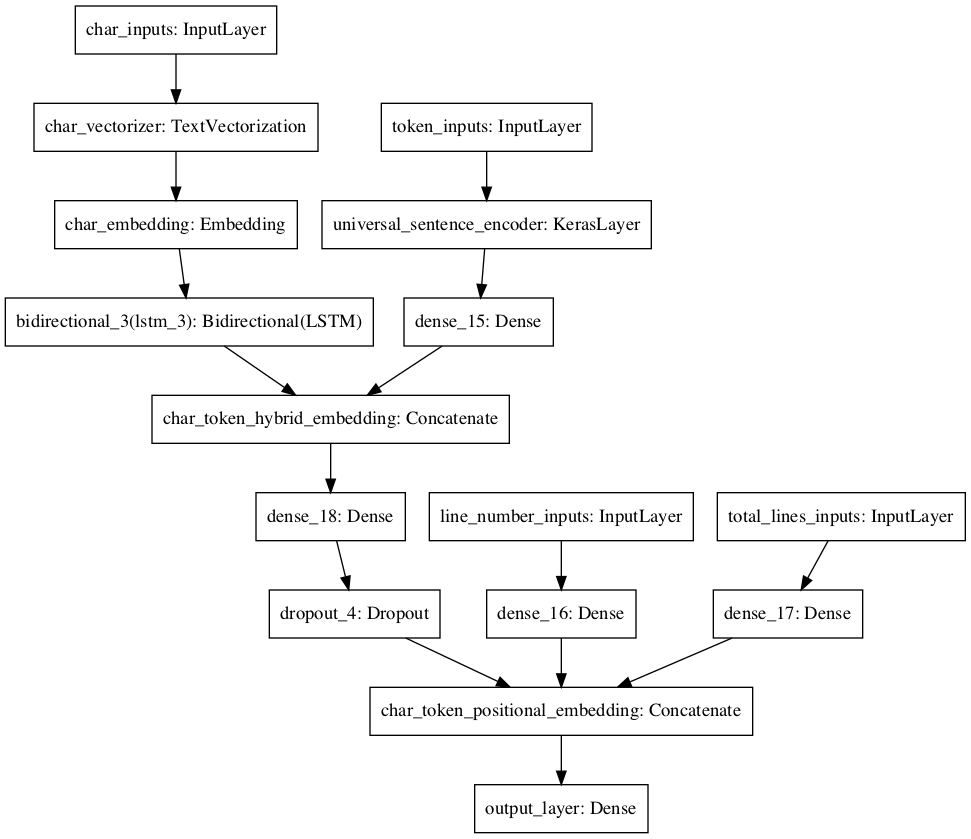

In [98]:
# Visualize model
plot_model(model_5)

In [99]:
# Compile model
model_5.compile(optimizer="adam",
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                metrics=["accuracy"])

In [109]:
# Create training dataset for all four input types
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Create validation dataset for all four input types
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Create test dataset for all four input types
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                                test_total_lines_one_hot,
                                                                test_sentences,
                                                                test_chars))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# View datasets
train_char_token_pos_dataset, val_char_token_pos_dataset, test_char_token_pos_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [115]:
# Fit model
history_5_tribrid = model_5.fit(train_char_token_pos_dataset,
                                epochs=3,
                                steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                                validation_data=val_char_token_pos_dataset,
                                validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 81s 133ms/step - loss: 1.2938 - accuracy: 0.5622 - val_loss: 1.0052 - val_accuracy: 0.7866
Epoch 2/3
562/562 [==============================] - 74s 131ms/step - loss: 0.9975 - accuracy: 0.7916 - val_loss: 0.9731 - val_accuracy: 0.8075
Epoch 3/3
562/562 [==============================] - 73s 130ms/step - loss: 0.9809 - accuracy: 0.8029 - val_loss: 0.9651 - val_accuracy: 0.8191


In [118]:
# Evaluate model
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 22s 24ms/step - loss: 0.9624 - accuracy: 0.8173


[0.9624291658401489, 0.8172580599784851]

In [119]:
# Make predictions and calculate results
pred_probs_model_5 = model_5.predict(val_char_token_pos_dataset)
preds_model_5 = tf.argmax(pred_probs_model_5, axis=1)
results_model_5 = calculate_results(val_labels_encoded, preds_model_5)

In [120]:
results_model_5

{'accuracy': 81.72580431616576,
 'precision': 0.8156777029223166,
 'recall': 0.8172580431616576,
 'f1': 0.8160738396534135}

## Compare Model Results

In [122]:
# Combine model results into a dataframe
results_all_models = pd.DataFrame({"model_0_baseline": results_baseline,
                                   "model_1_custome_token_embedding": results_model_1,
                                   "model_2_pretrained_token_embedding": results_model_2,
                                   "model_3_customer_char_embedding": results_model_3,
                                   "model_4_hybrid_char_token_embedding": results_model_3,
                                   "model_5_char_token_pos_embedding": results_model_5})
results_all_models = results_all_models.transpose()
results_all_models

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custome_token_embedding,78.770025,0.784929,0.787700,0.785584
model_2_pretrained_token_embedding,71.233285,0.712368,0.712333,0.709550
model_3_customer_char_embedding,65.801668,0.645488,0.658017,0.647923
model_4_hybrid_char_token_embedding,65.801668,0.645488,0.658017,0.647923
model_5_char_token_pos_embedding,81.725804,0.815678,0.817258,0.816074


In [123]:
# Reduce accuracy to same scale
results_all_models["accuracy"] = results_all_models["accuracy"]/100

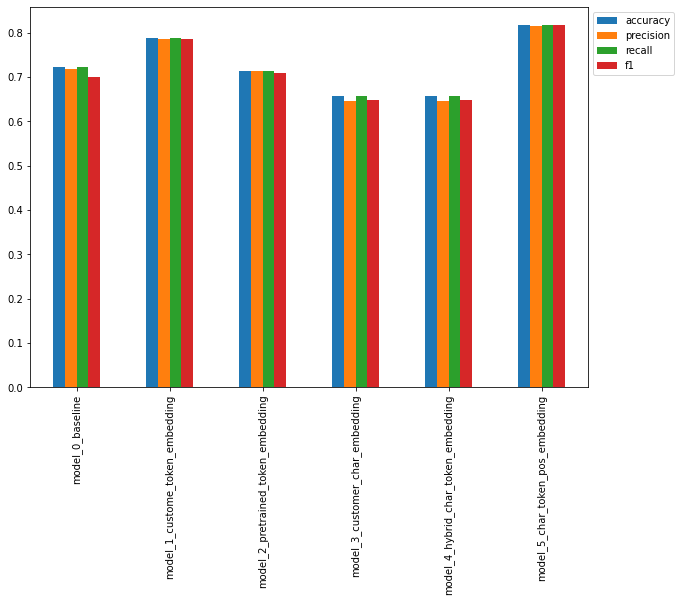

In [124]:
# Plot and compare all results
results_all_models.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

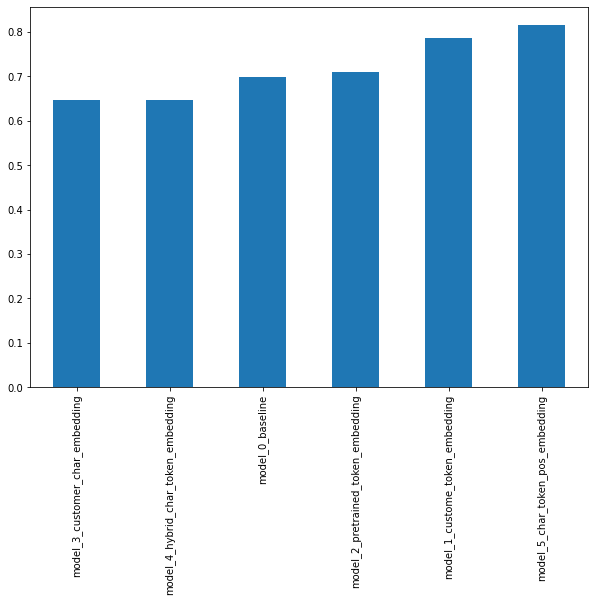

In [126]:
# Sort model results by f1-score
results_all_models.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7));

## Save Best Performing Model

In [127]:
# Save model 5
model_5.save("skimlit_tribrid_model")

INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


In [130]:
# Load saved model 5
loaded_model_5 = tf.keras.models.load_model("skimlit_tribrid_model")

In [135]:
# Make predictions with loaded model on test data
pred_probs_loaded_model_5 = loaded_model_5.predict(test_char_token_pos_dataset)

In [137]:
# Evaluate results
preds_loaded_model_5 = tf.argmax(pred_probs_loaded_model_5, axis=1)
results_loaded_model_5 = calculate_results(test_labels_encoded, preds_loaded_model_5)
results_loaded_model_5

{'accuracy': 81.02538576406172,
 'precision': 0.8088590594972546,
 'recall': 0.8102538576406172,
 'f1': 0.8089402204012928}